## Lab.6 Predictive Analytics for hospitals

## Step1: import dataset

In [1]:
import pandas as pd
f=pd.read_csv("diabetes.csv")

In [2]:
f.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
f.shape

(768, 9)

In [4]:
f.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
type(f)

pandas.core.frame.DataFrame

In [6]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
f.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

## Step2: Identifying relationships between features

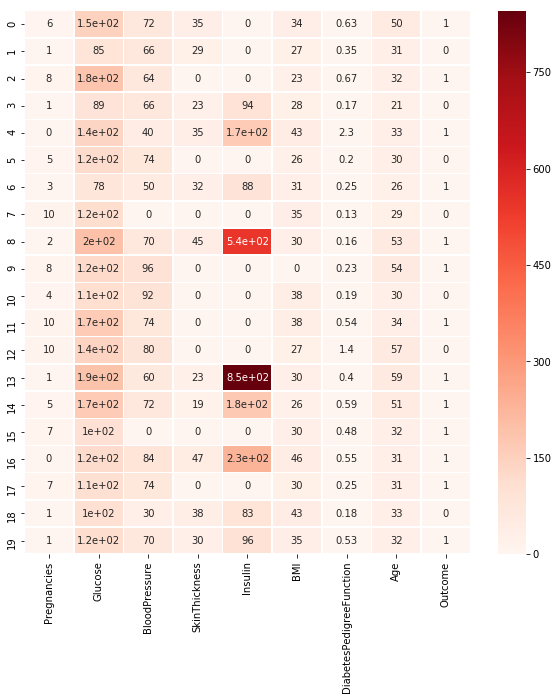

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(f.head(20), cmap='Reds',annot=True, linewidth=.5)

## Step 3:Prediction using one feature

In [9]:
X = f[['Age']]

In [10]:
y = f['Outcome']

In [11]:
from sklearn.linear_model import LogisticRegression
lrm1 = LogisticRegression()
lrm1.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
lrm1.coef_

array([[0.03916524]])

In [13]:
lrm1.intercept_

array([-1.93779453])

In [14]:
year_old = [[60]]
lrm1.predict(year_old)

array([1], dtype=int64)

In [15]:
lrf = lrm1.coef_ * 60 + lrm1.intercept_
from scipy.special import expit
if expit(lrf) > 0.5:
    print('YES, he will become diabetic')
else:
    print("NO, he will not be diabetic")

YES, he will become diabetic


## Step4. [Prediction using many features]

In [16]:
X1 = f[['Age', 'BMI', 'Glucose']]

In [17]:
lrm2 = LogisticRegression()

In [18]:
lrm2.fit(X1, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
lrm2.predict([[150, 30, 40]])

array([0], dtype=int64)

In [20]:
lrm2.predict_proba([[150, 30, 40]])

array([[0.6602238, 0.3397762]])

## Step5. [Build LoR model with all features]

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
X3 = f.drop('Outcome', axis=1)
lrm3 = LogisticRegression()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3,y,train_size=0.8,test_size=0.2)
lrm3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
y_pred = lrm3.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [24]:
from sklearn.metrics import roc_auc_score
print("LoR AUC ", roc_auc_score(y_test, y_pred))

LoR AUC  0.6601905473566224


## Step6: Forward selection procedures

In [25]:
type(f.columns)

pandas.core.indexes.base.Index

In [26]:
def get_auc(var,tar,df):
    fX = df[var]
    fy = df[tar]
    logreg = LogisticRegression()
    logreg.fit(fX,fy)
    pred=logreg.predict_proba(fX)[:,1]
    auc_val = roc_auc_score(y,pred)
    return auc_val
get_auc(["BMI","Glucose"],["Outcome"],f)

0.8102835820895523

In [27]:
get_auc(['Pregnancies', 'BloodPressure', 'SkinThickness'],["Outcome"],f)

0.6420932835820895

In [28]:
def best_next(current,cand,tar,df):
    best_auc = -1
    best_var = None
    for i in cand:
        auc_v = get_auc(current+[i],tar,df)
        if auc_v>=best_auc:
            best_auc = auc_v
            best_var = i
    return best_var

In [29]:
tar = ["Outcome"]
current = ['Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
cand = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness']
next_var = best_next(current,cand,tar,f)
print(next_var)

Glucose


In [30]:
tar = ["Outcome"]
current = []
cand = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction','Age']
max_num = 5
num_it = min(max_num,len(cand))
for i in range(0,num_it):
    next_var = best_next(current,cand,tar,f)
    current = current + [next_var]
    cand.remove(next_var)
print("Variable added in step " + str(i+1) + " is " + next_var + ".")
print(current)

Variable added in step 5 is Insulin.
['Glucose', 'BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin']


## Step7. [Plot Line graph of AUC values and select cut-off]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X3,y,test_size = 0.5,stratify =y)

In [32]:
pred2 = lrm3.predict_proba(X_test)

In [33]:
train = pd.concat([X_train,y_train], axis=1)
test = pd.concat([X_test,y_test], axis=1)

In [34]:
def auc_train_test(variables,target,train,test):
    X_train = train[variables]
    X_test = test[variables]
    Y_train = train[target]
    Y_test = test[target]
    logreg = LogisticRegression()
    logreg.fit(X_train, Y_train)
    predictions_train = logreg.predict_proba(X_train)[:,1]
    predictions_test = logreg.predict_proba(X_test)[:,1]
    auc_train = roc_auc_score(Y_train, predictions_train)
    auc_test = roc_auc_score(Y_test,predictions_test)
    return(auc_train, auc_test)

In [35]:
auc_values_train = []
auc_values_test = []
variables_evaluate = []
# Iterate over the variables in variables
for v in X3.columns:
# Add the variable
    variables_evaluate.append(v)
# Calculate the train and test AUC of this set of variables
    auc_train, auc_test = auc_train_test(variables_evaluate,["Outcome"],train,test)
# Append the values to the lists
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)

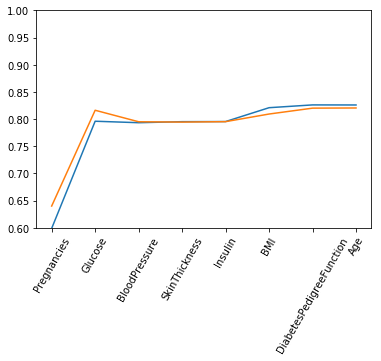

In [36]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array(range(0,len(auc_values_train)))
my_train = np.array(auc_values_train)
my_test = np.array(auc_values_test)
plt.xticks(x,X3.columns,rotation=60)
plt.plot(x,my_train)
plt.plot(x,my_test)
plt.ylim((0.6,1.0))
plt.show()

## Step8. [Draw Cumulative Gain Chart and Lift Chart]

In [37]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

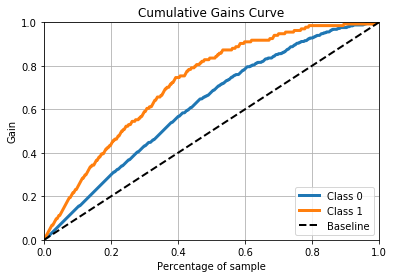

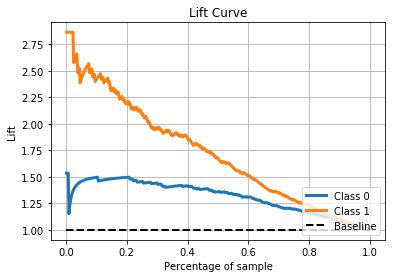

In [38]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test,pred2)
plt.show()
plt.figure(figsize=(7,7))
skplt.metrics.plot_lift_curve(y_test,pred2)
plt.show()